In [65]:
import openpyxl
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from datetime import datetime

In [49]:
# clarify path to csv
csv_file_path = r'C:\Users\Nick\Documents\Daveen\Code_Kentucky\ky-bridge-analysis-DaveenKnue\Ky_Bridge_Points.csv'

#specify dtype str to col 62 and 64
dtype_options = {'SERVTYPON': str, 'SERVTYPUND': str}

# read csv into a dataframe with specified dtypes
df = pd.read_csv(csv_file_path, dtype=dtype_options)

In [4]:
#view all districts
ky_districts = df['D_DISTRICT'].unique()
#test = df["DISTRICT"].unique()
#print(test)

print("All Kentucky Districts:")
print(ky_districts)

All Kentucky Districts:
['Paducah' 'Madisonville' 'Bowling Green' 'Covington' 'Flemingsburg'
 'Louisville' 'Lexington' 'Pikeville' 'Jackson' 'Elizabethtown' 'Somerset'
 'Manchester']


In [61]:
#Count Bridges per District (D)
#this is tedious and slow -- should be using for stmt to count all at once

paducah_bridge_count = (df['D_DISTRICT'] == "Paducah").sum()
print("D1 Bridge Count:", paducah_bridge_count)

madisonville_bridge_count = (df['D_DISTRICT'] == "Madisonville").sum()
print("D2 Bridge Count:", madisonville_bridge_count)

bowlinggreen_bridge_count = (df['D_DISTRICT'] == "Bowling Green").sum()
print("D3 Bridge Count:", bowlinggreen_bridge_count)

elizabethtown_bridge_count = (df['D_DISTRICT'] == "Elizabethtown").sum()
print("D4 Bridge Count:", elizabethtown_bridge_count)

louisville_bridge_count = (df['D_DISTRICT'] == "Louisville").sum()
print("D5 Bridge Count:", louisville_bridge_count)

covington_bridge_count = (df['D_DISTRICT'] == "Covington").sum()
print("D6 Bridge Count:", covington_bridge_count)

lexington_bridge_count = (df['D_DISTRICT'] == "Lexington").sum()
print("D7 Bridge Count:", lexington_bridge_count)

somerset_bridge_count = (df['D_DISTRICT'] == "Somerset").sum()
print("D8 Bridge Count:", somerset_bridge_count)

flemingsburg_bridge_count = (df['D_DISTRICT'] == "Flemingsburg").sum()
print("D9 Bridge Count:", flemingsburg_bridge_count)

jackson_bridge_count = (df['D_DISTRICT'] == "Jackson").sum()
print("D10 Bridge Count:", jackson_bridge_count)

manchester_bridge_count = (df['D_DISTRICT'] == "Manchester").sum()
print("D11 Bridge Count:",manchester_bridge_count)

pikeville_bridge_count = (df['D_DISTRICT'] == "Pikeville").sum()
print("D12 Bridge Count:", pikeville_bridge_count)




D1 Bridge Count: 2074
D2 Bridge Count: 2466
D3 Bridge Count: 1109
D4 Bridge Count: 1350
D5 Bridge Count: 2293
D6 Bridge Count: 1428
D7 Bridge Count: 1722
D8 Bridge Count: 1155
D9 Bridge Count: 1317
D10 Bridge Count: 1057
D11 Bridge Count: 1367
D12 Bridge Count: 1281


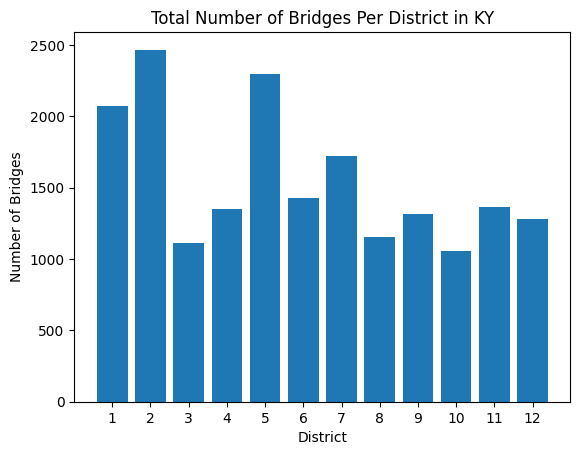

In [30]:
#Count Bridges per District (D)
district_bridge_counts = df['DISTRICT'].value_counts()

# Print bridge counts for each district
# for district, count in district_bridge_counts.items():
#    print(f"D{district} Bridge Count: {count}")

#plot data
plt.bar(district_bridge_counts.index, district_bridge_counts.values)
plt.xlabel('District')
plt.ylabel('Number of Bridges')
plt.title('Total Number of Bridges Per District in KY')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.show()

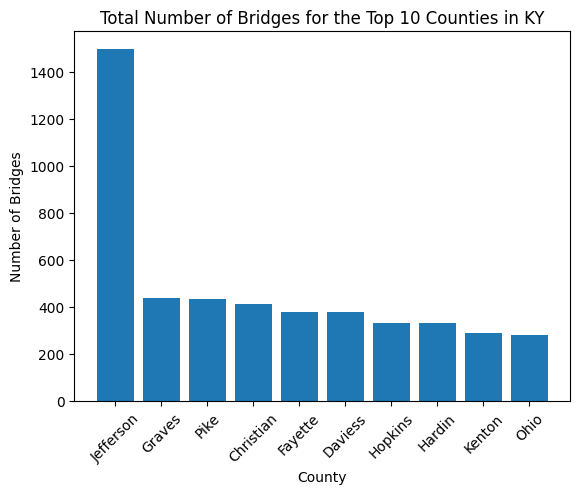

In [35]:
# Count Bridges per County and Sort Highest Counts
county_bridge_counts = df['CNTY_NAME'].value_counts()

# Print bridge counts for each county
#for county, count in county_bridge_counts.items():
#    print(f"{county} Bridge Count: {count}")

# Sort the counties by the number of bridges in descending order
county_order = county_bridge_counts.sort_values(ascending=False)

# Select the top ten counties
top_ten_counties = county_order.head(10)

# Plot Data 
plt.bar(top_ten_counties.index, top_ten_counties.values)
plt.xlabel('County')
plt.ylabel('Number of Bridges')
plt.title('Total Number of Bridges for the Top 10 Counties in KY')
plt.xticks(rotation=45)
plt.show()

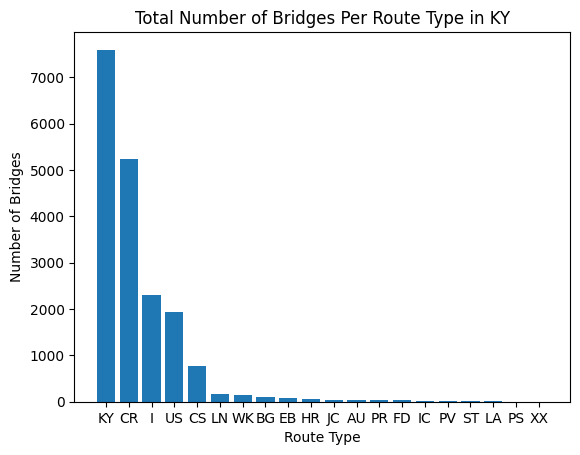

In [33]:
# Count Bridges per Route Type
route_bridge_counts = df['RT_PREFIX'].value_counts()

#print bridge counts for each route type
#for route, count in route_bridge_counts.items():
#    print(f"{route} Bridge Count: {count}")

plt.bar(route_bridge_counts.index, route_bridge_counts.values)
plt.xlabel('Route Type')
plt.ylabel('Number of Bridges')
plt.title('Total Number of Bridges Per Route Type in KY')
#plt.xticks(rotation=45)
plt.show()

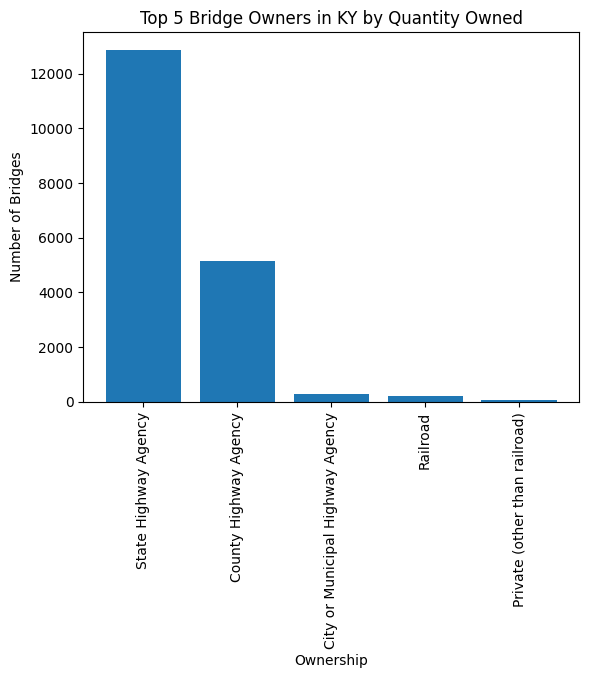

In [45]:
# Count Number of Bridges by Ownership
owner_bridge_counts = df['D_OWNER'].value_counts()

#print bridge counts for each owner
#for owner, count in owner_bridge_counts.items():
#    print(f"{owner} Bridge Count: {count}")

# Sort the owners by the number of bridges in descending order
owner_order = owner_bridge_counts.sort_values(ascending=False)

# Select the top five owners by quanity of bridges owned
top_five_owners = owner_order.head()

# Plot Data 
plt.bar(top_five_owners.index, top_five_owners.values)
plt.xlabel('Ownership')
plt.ylabel('Number of Bridges')
plt.title('Top 5 Bridge Owners in KY by Quantity Owned')
plt.xticks(rotation=90)
plt.show()

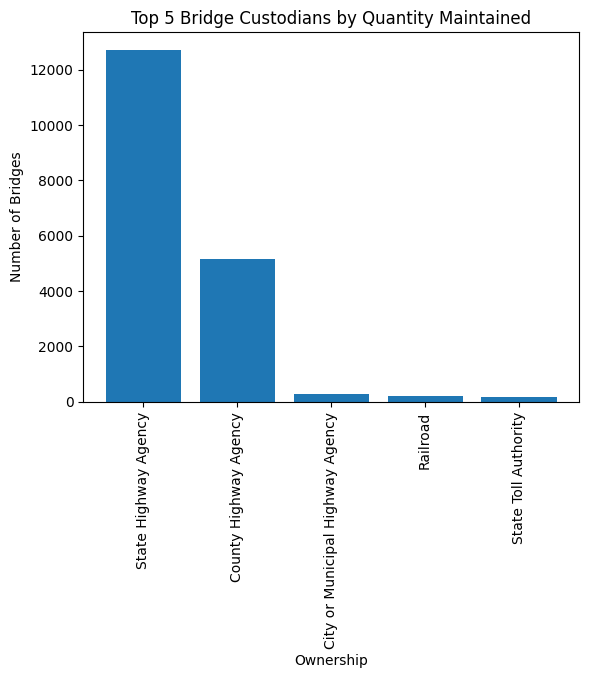

In [48]:
# Count Number of Bridges by Custodian
custodian_bridge_counts = df['D_CUSTODIAN'].value_counts()

#print bridge counts for each custodian
#for custodian, count in custodian_bridge_counts.items():
#    print(f"{custodian} Bridge Count: {count}")

# Sort the custodians by the number of bridges in descending order
custodian_order = custodian_bridge_counts.sort_values(ascending=False)

# Select the top five custodians by quantity of maintained bridges
top_five_custodians = custodian_order.head()

# Plot Data 
plt.bar(top_five_custodians.index, top_five_custodians.values)
plt.xlabel('Ownership')
plt.ylabel('Number of Bridges')
plt.title('Top 5 Bridge Custodians by Quantity Maintained')
plt.xticks(rotation=90)
plt.show()



In [19]:
##Calculate Max, Min, Mean and Mode Lengths of Bridges in KY
longest_bridge = df["LENGTH"].max()
shortest_bridge = df["LENGTH"].min()
avg_bridge_length = round(df["LENGTH"].mean(), 1)
mode_bridge_length = df["LENGTH"].mode().iloc[0]

#identify "name(s)" of the longest bridge(s)
#

#identify "name(s)" of the shortest bridge(s)
#

##Calculate Max, Min and Mean Widths of Bridges in KY
widest_bridge = df[df["ROADWIDTH"] !=0]["ROADWIDTH"].max()
narrowest_bridge = df[df["ROADWIDTH"] !=0]["ROADWIDTH"].min()
avg_bridge_width = round(df[df["ROADWIDTH"] !=0]["ROADWIDTH"].mean(), 1)
mode_bridge_width = df[df["ROADWIDTH"] != 0]["ROADWIDTH"].mode().iloc[0]

#identify "name(s)" of the widest bridge(s)
#

#identify "name(s)" of the narrowest bridge(s)
#

print("The longest bridge is", longest_bridge, "ft and the shortest bridge is", shortest_bridge, "ft.")
print("The average bridge length is", avg_bridge_length,"ft.")
print("The most common bridge length is", mode_bridge_length, "ft.")
print("")
print("The widest bridge is", widest_bridge, "ft and the narrowest bridge is", narrowest_bridge,"ft.")
print("The average bridge width is", avg_bridge_width, "ft.")
print("The most common bridge width is", mode_bridge_width, "ft.")

The longest bridge is 5865.2 ft and the shortest bridge is 12.1 ft.
The average bridge length is 168.2 ft.
The most common bridge length is 23.0 ft.

The widest bridge is 274.0 ft and the narrowest bridge is 4.0 ft.
The average bridge width is 28.8 ft.
The most common bridge width is 24.0 ft.


In [20]:
## Determine Average Age of Bridges

# identify current year
current_year = datetime.now().year

# Calculate the age of each bridge
# Now df contains a new column "BRIDGE_AGE" with the age of each bridge
df["BRIDGE_AGE"] = current_year - df["YEARBUILT"]

#calculate average age of a bridge in KY
avg_bridge_age = round(df["BRIDGE_AGE"].mean(), 1)

#calculate most common age of a bridge
mode_bridge_age = df["BRIDGE_AGE"].mode().iloc[0]

print("The average bridge age is", avg_bridge_age,"years.")
print("The most common bridge age is", mode_bridge_age,"years.")

The average bridge age is 46.1 years.
The most common bridge age is 54 years.


In [33]:
#Read in file containing Weight Limits for Bridges in Kentucky
# If the file is in the same directory as your Python script, you can just specify the filename
df_w = pd.read_csv('Kentuckys Weight-Posted Bridges.csv')

#join Ky_Bridge_Points.csv with Kentuckys Weight-Posted Bridges.xlsx by Bridge ID using pandas
merged_df = pd.merge(df, df_w, left_on='BRIDGE_ID', right_on='Bridge ID#', how='inner')


In [34]:
##Calculate max, min, mean and mode weight load limits for Bridges with SU5 Load Limit Postings
max_bridge_limit = merged_df["SU5 (tons)"].max()
min_bridge_limit = merged_df["SU5 (tons)"].min()
avg_bridge_limit = round(merged_df["SU5 (tons)"].mean(), 1)
mode_bridge_limit = merged_df["SU5 (tons)"].mode().iloc[0]


print("The heaviest weight limit for bridges is", max_bridge_limit, "tons.")
print("The lightest weight limit for bridges is", min_bridge_limit, "tons.")
print("The average weight limit for bridges is", avg_bridge_limit, "tons.")
print("The most common weight limit for bridges is", mode_bridge_limit, "tons.")

The heaviest weight limit for bridges is 43.0 tons.
The lightest weight limit for bridges is 20.0 tons.
The average weight limit for bridges is 35.8 tons.
The most common weight limit for bridges is 40.0 tons.


In [83]:
# Read in file containing KYTC Project Archives and isolate projects involving Bridges

# If the file is in the same directory as your Python script, you can just specify the filename
df_p = pd.read_csv('KYTC Project Archives.csv')

#isolate projects regarding bridges
kytc_bridge_projects = df_p[df_p['WORK TYPE DESCRIPTION'].str.contains('bridge', case=False, na=False)]
                        
#calculate number of KYTC Bridge Projects in file (2007 - Present)
print("From 2007 - Present, KYTC has completed", len(kytc_bridge_projects),"Bridge Projects.")



# Remove NaN values from the "LOW BID AMT" column and filter out non-numeric values
cleaned_low_bid_amt = df_p['LOW BID AMT'].dropna().apply(pd.to_numeric, errors='coerce').dropna()

# Calculate max, min, mean, and mode KYTC Bridge Project Cost (2007 - Present)
if not cleaned_low_bid_amt.empty:
    highest_bridge_cost = cleaned_low_bid_amt.max()
    lowest_bridge_cost = cleaned_low_bid_amt.min()
    avg_bridge_cost = round(cleaned_low_bid_amt.mean(), 1)
else:
    # Handle case where no valid numeric values are present
    highest_bridge_cost = np.nan
    lowest_bridge_cost = np.nan
    avg_bridge_cost = np.nan

print("The KYTC Bridge Project that cost the most from 2007 - Present was $",highest_bridge_cost)
print("The KYTC Bridge Project that cost the least from 2007 - Present was $", lowest_bridge_cost)
print("The average cost for a KYTC Bridge Project from 2007 - Present was $", avg_bridge_cost)

From 2007 - Present, KYTC has completed 6096 Bridge Projects.
The KYTC Bridge Project that cost the most from 2007 - Present was $ 97116897.94
The KYTC Bridge Project that cost the least from 2007 - Present was $ 154.42
The average cost for a KYTC Bridge Project from 2007 - Present was $ 2091304.6


In [16]:
# view all col names
# print(df.columns)

#isolate col 62 and 64
# column62_name = df.columns[62]
# column64_name = df.columns[64]
# print("Name of column 62:", column62_name)
# print("Name of column 64:", column64_name)

Index(['X', 'Y', 'OBJECTID', 'RT_UNIQUE', 'MIDPOINT_MP', 'LEADING_MP',
       'TRAILING_MP', 'D_MIDPOINT_MP', 'D_LEADING_MP', 'D_TRAILING_MP',
       'GOV_LEVEL', 'D_GOV_LEVEL', 'RT_DESCR', 'DISTRICT', 'D_DISTRICT',
       'CNTY_NAME', 'COUNTY', 'RT_PREFIX', 'D_RT_PREFIX', 'RT_NUMBER',
       'RT_SUFFIX', 'D_RT_SUFFIX', 'RT_SECTION', 'D_RT_SECTION', 'DATUM_ID',
       'DATUM_OFFSET', 'START_DATE', 'MODIFY_DT', 'EXTRACT_DT', 'ON_UNDER',
       'D_ON_UNDER', 'PERCENT_LOCATED', 'BRIDGE_ID', 'FEATINT', 'BYPASSLEN',
       'NBI_RATING', 'LENGTH', 'MAXSPAN', 'OWNER', 'D_OWNER', 'CUSTODIAN',
       'D_CUSTODIAN', 'LMVCDEC', 'OVMVCDEC', 'HCLRINV', 'AROADWIDTH',
       'ROADWIDTH', 'LANES', 'RTCURBSW', 'LFTCURBSW', 'OPPOSTCL', 'D_OPPOSTCL',
       'SCOURCRIT', 'D_SCOURCRIT', 'YEARBUILT', 'HISTSIGN', 'D_HISTSIGN',
       'DKRATING', 'SUPRATING', 'SUBRATING', 'CULVRATING', 'D_CULVRATING',
       'SERVTYPON', 'D_SERVTYPON', 'SERVTYPUND', 'D_SERVTYPUND', 'MAINSPANS',
       'APPSPANS', 'NAVCNTROL',

In [23]:
# view first 5 rows of col 62 and 64 to assess dtypes
# print(df['SERVTYPON'].head())
# print(df['SERVTYPUND'].head())

# head only shows int. viewing more rows to find other dtypes
#print(df.iloc[:, 62].head(100))
#print(df.iloc[:, 64].head(100))

#only int dtype found
#assign dtype int to col 62 and 64
#dtype_options = {'62': 'int', '64': 'int'}
